<img src="img/VAE-VAEvsAE.png"/>

# [VAE](https://arxiv.org/pdf/1312.6114.pdf) [local-paper](http://localhost:8888/notebooks/Dropbox/Paper/Auto-Encoding Variational Bayes.pdf) [local-slide](http://localhost:8888/notebooks/Dropbox/Paper/Auto-Encoding Variational Bayes slide.pdf) [code-wiseodd](https://github.com/wiseodd/generative-models/blob/master/VAE/vanilla_vae/vae_tensorflow.py) [code-oduerr-Simple example 2-D distribution](https://github.com/oduerr/dl_tutorial/blob/master/tensorflow/vae/vae_demo-2D.ipynb)  [code-oduerr-Simple MNIST Example](https://github.com/oduerr/dl_tutorial/blob/master/tensorflow/vae/vae_demo.ipynb)

[Introduction to variational autoencoders](https://home.zhaw.ch/~dueo/bbs/files/vae.pdf) [local](http://localhost:8888/notebooks/Dropbox/Paper/Introduction to variational autoencoders.pdf)

[Variational Coin Toss](http://www.openias.org/variational-coin-toss)

초짜 대학원생의 입장에서 이해하는 VAE [1](http://jaejunyoo.blogspot.com/2017/04/auto-encoding-variational-bayes-vae-1.html) [2](http://jaejunyoo.blogspot.com/2017/04/auto-encoding-variational-bayes-vae-2.html) [3](http://jaejunyoo.blogspot.com/2017/05/auto-encoding-variational-bayes-vae-3.html)

PR-010 Auto-Encoding Variational Bayes, ICLR 2014 [차준범](https://www.youtube.com/watch?v=KYA-GEhObIs) 

Deep generative model [조형주](https://www.slideshare.net/HyungjooCho2/deep-generative-modelpdf) [local](http://localhost:8888/notebooks/Dropbox/Paper/deepgenerativemodel-170504024230.pdf)

[Deep Learning Lecture 14: Karol Gregor on Variational Autoencoders and Image Generation](https://www.youtube.com/watch?v=P78QYjWh5sM)

Variational Autoencoder: Intuition and Implementation by [wiseodd](http://wiseodd.github.io/techblog/2016/12/10/variational-autoencoder/)

Variational Autoencoder in TensorFlow by [Jan Hendrik Metzen](https://jmetzen.github.io/2015-11-27/vae.html)

Variational Autoencoders Explained [Kevin Frans](http://kvfrans.com/variational-autoencoders-explained/)

Tutorial - What is variational autoencoder? [Jaan Altosaar](https://jaan.io/what-is-variational-autoencoder-vae-tutorial/) [한글판](http://nolsigan.com/blog/what-is-variational-autoencoder/)

Tutorial on Variational Autoencoders [CARL DOERSCH](https://arxiv.org/pdf/1606.05908.pdf) [local](http://localhost:8888/notebooks/Dropbox/Paper/Tutorial on Variational Autoencoders.pdf)

[Deep Style Using Variational Auto-encoders for Image Generation](https://www.slideshare.net/TJTorres1/deep-style-using-variational-autoencoders-for-image-generation) [local](http://localhost:8888/notebooks/Dropbox/Paper/Deep Style Using Variational Auto-encoders for Image Generation.pdf)

<img src="img/What are autoencoders 3.png"/>

<img src="img/VAE 3.png"/>

# Reparameterization trick

<img src="img/Reparameterization trick.png"/>

# VAE - directed graphical model

<img src="img/VAE - directed graphical model.png"/>


# ELBO

<img src="img/VAE-eq1.png"/>

<img src="img/VAE-eq2.png"/>

<img src="img/VAE-eq3.png"/>

# Bernoulli MLP as decoder

<img src="img/Bernoulli MLP as decoder.png"/>

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Number of train samples: 55000, Shape of y: (55000, 10), Shape of X: (55000, 784)
0.0
1.0


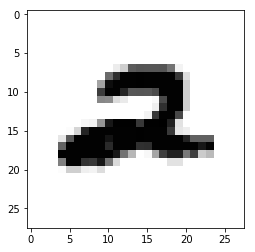

Iter: 0, Loss: 795.4
Iter: 1000, Loss: 145.3
Iter: 2000, Loss: 124.5
Iter: 3000, Loss: 117.9
Iter: 4000, Loss: 113.7
Iter: 5000, Loss: 118.2
Iter: 6000, Loss: 112.5
Iter: 7000, Loss: 112.6
Iter: 8000, Loss: 113.4
Iter: 9000, Loss: 109.8
Iter: 10000, Loss: 115.5
Iter: 11000, Loss: 103.8
Iter: 12000, Loss: 117.3
Iter: 13000, Loss: 108.6
Iter: 14000, Loss: 106.9
Iter: 15000, Loss: 114.5
Iter: 16000, Loss: 104.8
Iter: 17000, Loss: 104.8
Iter: 18000, Loss: 109.5
Iter: 19000, Loss: 110.5
Iter: 20000, Loss: 106.4
Iter: 21000, Loss: 107.8
Iter: 22000, Loss: 110.3
Iter: 23000, Loss: 110.9
Iter: 24000, Loss: 112.1
Iter: 25000, Loss: 102.5
Iter: 26000, Loss: 112.9
Iter: 27000, Loss: 103.6
Iter: 28000, Loss: 104.3
Iter: 29000, Loss: 110.5
Iter: 30000, Loss: 111.2
Iter: 31000, Loss: 107.2
Iter: 32000, Loss: 103.1
Iter: 33000, Loss: 104.8
Iter: 34000, Loss: 114.1
Iter: 35000, Loss: 104.7
Iter: 36000, Loss: 104.3
Iter: 37000, Loss: 109.2
Iter: 38000, Loss: 104.7
Iter: 39000, Loss: 102.0
Iter: 40000, 

In [1]:
# https://github.com/wiseodd/generative-models/blob/master/VAE/vanilla_vae/vae_tensorflow.py

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from tensorflow.examples.tutorials.mnist import input_data

mb_size = 64
z_dim = 100
h_dim = 128
c = 0
lr = 1e-3
run = 1000000

try:
    mnist = input_data.read_data_sets("data/MNIST/", one_hot=True)
except:
    mnist = input_data.read_data_sets('../../Data/MNIST', one_hot=True)
    
n_samples = mnist.train.num_examples
X_dim = mnist.train.images.shape[1] # 28 * 28 = 784
y_dim = mnist.train.labels.shape[1] # 10
print("Number of train samples: {}, Shape of y: {}, Shape of X: {}"
      .format(mnist.train.num_examples, mnist.train.labels.shape, mnist.train.images.shape))
print(mnist.train.images.min())
print(mnist.train.images.max())
plt.imshow(np.reshape(-mnist.train.images[4242], (28, 28)), interpolation='none',cmap=plt.get_cmap('gray'))
plt.show()

def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)
    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')
    return fig

def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

# =============================== Q(z|X) ======================================

X = tf.placeholder(tf.float32, shape=[None, X_dim])

Q_W1 = tf.Variable(xavier_init([X_dim, h_dim]))
Q_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

Q_W2_mu = tf.Variable(xavier_init([h_dim, z_dim]))
Q_b2_mu = tf.Variable(tf.zeros(shape=[z_dim]))

Q_W2_sigma = tf.Variable(xavier_init([h_dim, z_dim]))
Q_b2_sigma = tf.Variable(tf.zeros(shape=[z_dim]))

def Q(X):
    h = tf.nn.relu(tf.matmul(X, Q_W1) + Q_b1)
    z_mu = tf.matmul(h, Q_W2_mu) + Q_b2_mu
    z_logvar = tf.matmul(h, Q_W2_sigma) + Q_b2_sigma
    return z_mu, z_logvar

# reparametrization trick
def sample_z(mu, log_var):
    eps = tf.random_normal(shape=tf.shape(mu))
    return mu + tf.exp(log_var / 2) * eps

z = tf.placeholder(tf.float32, shape=[None, z_dim])

# =============================== P(X|z) ======================================

P_W1 = tf.Variable(xavier_init([z_dim, h_dim]))
P_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

P_W2 = tf.Variable(xavier_init([h_dim, X_dim]))
P_b2 = tf.Variable(tf.zeros(shape=[X_dim]))

def P(z):
    h = tf.nn.relu(tf.matmul(z, P_W1) + P_b1)
    logits = tf.matmul(h, P_W2) + P_b2
    prob = tf.nn.sigmoid(logits)
    return prob, logits

# =============================== TRAINING ====================================

z_mu, z_logvar = Q(X)
z_sample = sample_z(z_mu, z_logvar)
_, logits = P(z_sample)

# Sampling from random z
X_samples, _ = P(z)

# E[log P(X|z)]
recon_loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=X), 1)
# D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
kl_loss = 0.5 * tf.reduce_sum(tf.exp(z_logvar) + z_mu**2 - 1. - z_logvar, 1)
# VAE loss
vae_loss = tf.reduce_mean(recon_loss + kl_loss)

solver = tf.train.AdamOptimizer().minimize(vae_loss)

with tf.Session() as sess:
    tf.global_variables_initializer().run()

    if not os.path.exists('out/'):
        os.makedirs('out/')

    for it in range(run):
        X_mb, _ = mnist.train.next_batch(mb_size)
        _, loss = sess.run([solver, vae_loss], feed_dict={X: X_mb})
        
        i = 0
        if it % 1000 == 0:
            print('Iter: {}, Loss: {:.4}'.format(it,loss))
            samples = sess.run(X_samples, feed_dict={z: np.random.randn(16, z_dim)})
            fig = plot(samples)
            plt.savefig('out/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
            plt.close(fig)
            i += 1

# Exercise.

<img src="img/VAE-eq4.png"/>

The above code is the case $L=1$. Modify the code for general $L$.

# Exercise.

Modify the above code and construct the autoencoder code.

# Exercise.

Write your own code to generate the below figure.

<img src="img/VAE-VAEvsAE.png"/>

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Number of train samples: 55000, Shape of y: (55000, 10), Shape of X: (55000, 784)
0.0
1.0


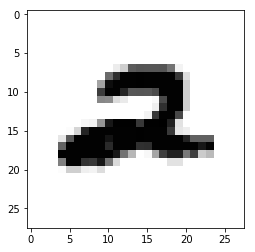

Epoch: 0001 cost= 177.325801336
Epoch: 0006 cost= 109.419503104
Epoch: 0011 cost= 103.790621005
Epoch: 0016 cost= 101.481337322
Epoch: 0021 cost= 100.102160312
Epoch: 0026 cost= 99.113575842
Epoch: 0031 cost= 98.343347043
Epoch: 0036 cost= 97.719503007
Epoch: 0041 cost= 97.237877683
Epoch: 0046 cost= 96.799652863
Epoch: 0051 cost= 96.379222662
Epoch: 0056 cost= 95.970570512
Epoch: 0061 cost= 95.669476915
Epoch: 0066 cost= 95.461107441
Epoch: 0071 cost= 95.163888494


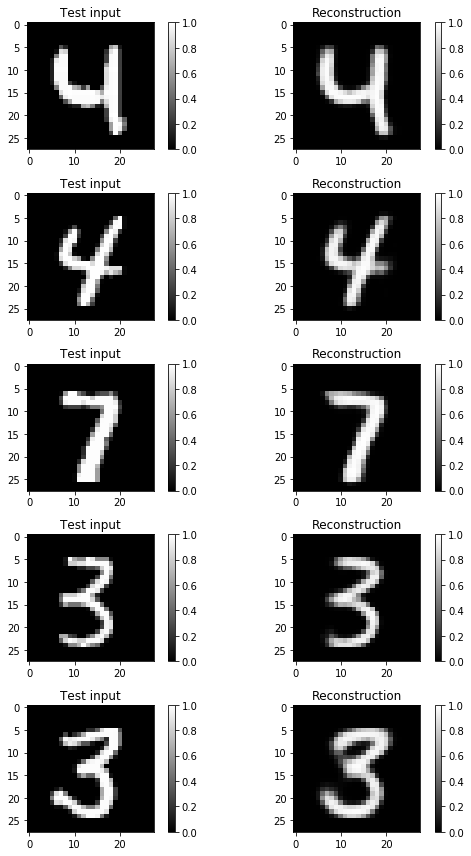

Epoch: 0001 cost= 194.256582475
Epoch: 0006 cost= 154.581429138
Epoch: 0011 cost= 149.337910184
Epoch: 0016 cost= 146.582823902
Epoch: 0021 cost= 144.709546731
Epoch: 0026 cost= 143.379420998
Epoch: 0031 cost= 142.372895341
Epoch: 0036 cost= 141.574198248
Epoch: 0041 cost= 140.957250366
Epoch: 0046 cost= 140.465698894
Epoch: 0051 cost= 140.017088540
Epoch: 0056 cost= 139.591557243
Epoch: 0061 cost= 139.293765384
Epoch: 0066 cost= 139.031505973
Epoch: 0071 cost= 138.747834695


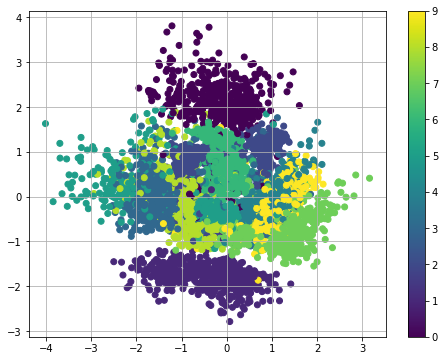

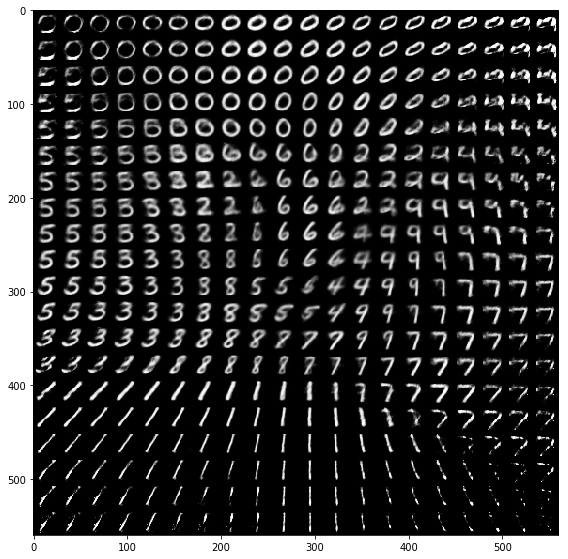

In [1]:
# https://jmetzen.github.io/2015-11-27/vae.html

import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

np.random.seed(0)
tf.set_random_seed(1)

try:
    mnist = input_data.read_data_sets("data/MNIST/", one_hot=True)
except:
    mnist = input_data.read_data_sets('../../Data/MNIST', one_hot=True)
    
n_samples = mnist.train.num_examples
X_dim = mnist.train.images.shape[1] # 28 * 28 = 784
y_dim = mnist.train.labels.shape[1] # 10
print("Number of train samples: {}, Shape of y: {}, Shape of X: {}"
      .format(mnist.train.num_examples, mnist.train.labels.shape, mnist.train.images.shape))
print(mnist.train.images.min())
print(mnist.train.images.max())
plt.imshow(np.reshape(-mnist.train.images[4242], (28, 28)), interpolation='none',cmap=plt.get_cmap('gray'))
plt.show()

def xavier_init(fan_in, fan_out, constant=1): 
    # https://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
    low = -constant*np.sqrt(6.0/(fan_in + fan_out)) 
    high = constant*np.sqrt(6.0/(fan_in + fan_out))
    return tf.random_uniform((fan_in, fan_out), 
                             minval=low, maxval=high, 
                             dtype=tf.float32)


class VariationalAutoencoder(object):
    """ Variation Autoencoder (VAE) with an sklearn-like interface implemented using TensorFlow.
    
    This implementation uses probabilistic encoders and decoders using Gaussian 
    distributions and  realized by multi-layer perceptrons. The VAE can be learned
    end-to-end.
    
    See "Auto-Encoding Variational Bayes" by Kingma and Welling for more details.
    """
    def __init__(self, network_architecture, transfer_fct=tf.nn.softplus, 
                 learning_rate=0.001, batch_size=100):
        self.network_architecture = network_architecture
        self.transfer_fct = transfer_fct
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        
        # tf Graph input
        self.x = tf.placeholder(tf.float32, [None, network_architecture["n_input"]])
        
        # Create autoencoder network
        self._create_network()
        # Define loss function based variational upper-bound and 
        # corresponding optimizer
        self._create_loss_optimizer()
        
        # Initializing the tensor flow variables
        init = tf.global_variables_initializer()

        # Launch the session
        self.sess = tf.InteractiveSession()
        self.sess.run(init)
    
    def _create_network(self):
        # Initialize autoencode network weights and biases
        network_weights = self._initialize_weights(**self.network_architecture)

        # Use recognition network to determine mean and 
        # (log) variance of Gaussian distribution in latent
        # space
        self.z_mean, self.z_log_sigma_sq = \
            self._recognition_network(network_weights["weights_recog"], 
                                      network_weights["biases_recog"])

        # Draw one sample z from Gaussian distribution
        n_z = self.network_architecture["n_z"]
        eps = tf.random_normal((self.batch_size, n_z), 0, 1, 
                               dtype=tf.float32)
        # z = mu + sigma*epsilon
        self.z = tf.add(self.z_mean, 
                        tf.multiply(tf.sqrt(tf.exp(self.z_log_sigma_sq)), eps))

        # Use generator to determine mean of
        # Bernoulli distribution of reconstructed input
        self.x_reconstr_mean = \
            self._generator_network(network_weights["weights_gener"],
                                    network_weights["biases_gener"])
            
    def _initialize_weights(self, n_hidden_recog_1, n_hidden_recog_2, 
                            n_hidden_gener_1,  n_hidden_gener_2, 
                            n_input, n_z):
        all_weights = dict()
        all_weights['weights_recog'] = {
            'h1': tf.Variable(xavier_init(n_input, n_hidden_recog_1)),
            'h2': tf.Variable(xavier_init(n_hidden_recog_1, n_hidden_recog_2)),
            'out_mean': tf.Variable(xavier_init(n_hidden_recog_2, n_z)),
            'out_log_sigma': tf.Variable(xavier_init(n_hidden_recog_2, n_z))}
        all_weights['biases_recog'] = {
            'b1': tf.Variable(tf.zeros([n_hidden_recog_1], dtype=tf.float32)),
            'b2': tf.Variable(tf.zeros([n_hidden_recog_2], dtype=tf.float32)),
            'out_mean': tf.Variable(tf.zeros([n_z], dtype=tf.float32)),
            'out_log_sigma': tf.Variable(tf.zeros([n_z], dtype=tf.float32))}
        all_weights['weights_gener'] = {
            'h1': tf.Variable(xavier_init(n_z, n_hidden_gener_1)),
            'h2': tf.Variable(xavier_init(n_hidden_gener_1, n_hidden_gener_2)),
            'out_mean': tf.Variable(xavier_init(n_hidden_gener_2, n_input)),
            'out_log_sigma': tf.Variable(xavier_init(n_hidden_gener_2, n_input))}
        all_weights['biases_gener'] = {
            'b1': tf.Variable(tf.zeros([n_hidden_gener_1], dtype=tf.float32)),
            'b2': tf.Variable(tf.zeros([n_hidden_gener_2], dtype=tf.float32)),
            'out_mean': tf.Variable(tf.zeros([n_input], dtype=tf.float32)),
            'out_log_sigma': tf.Variable(tf.zeros([n_input], dtype=tf.float32))}
        return all_weights
            
    def _recognition_network(self, weights, biases):
        # Generate probabilistic encoder (recognition network), which
        # maps inputs onto a normal distribution in latent space.
        # The transformation is parametrized and can be learned.
        layer_1 = self.transfer_fct(tf.add(tf.matmul(self.x, weights['h1']), 
                                           biases['b1'])) 
        layer_2 = self.transfer_fct(tf.add(tf.matmul(layer_1, weights['h2']), 
                                           biases['b2'])) 
        z_mean = tf.add(tf.matmul(layer_2, weights['out_mean']),
                        biases['out_mean'])
        z_log_sigma_sq = \
            tf.add(tf.matmul(layer_2, weights['out_log_sigma']), 
                   biases['out_log_sigma'])
        return (z_mean, z_log_sigma_sq)

    def _generator_network(self, weights, biases):
        # Generate probabilistic decoder (decoder network), which
        # maps points in latent space onto a Bernoulli distribution in data space.
        # The transformation is parametrized and can be learned.
        layer_1 = self.transfer_fct(tf.add(tf.matmul(self.z, weights['h1']), 
                                           biases['b1'])) 
        layer_2 = self.transfer_fct(tf.add(tf.matmul(layer_1, weights['h2']), 
                                           biases['b2'])) 
        x_reconstr_mean = \
            tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['out_mean']), 
                                 biases['out_mean']))
        return x_reconstr_mean
            
    def _create_loss_optimizer(self):
        # The loss is composed of two terms:
        # 1.) The reconstruction loss (the negative log probability
        #     of the input under the reconstructed Bernoulli distribution 
        #     induced by the decoder in the data space).
        #     This can be interpreted as the number of "nats" required
        #     for reconstructing the input when the activation in latent
        #     is given.
        # Adding 1e-10 to avoid evaluation of log(0.0)
        reconstr_loss = \
            -tf.reduce_sum(self.x * tf.log(1e-10 + self.x_reconstr_mean)
                           + (1-self.x) * tf.log(1e-10 + 1 - self.x_reconstr_mean),
                           1)
        # 2.) The latent loss, which is defined as the Kullback Leibler divergence 
        ##    between the distribution in latent space induced by the encoder on 
        #     the data and some prior. This acts as a kind of regularizer.
        #     This can be interpreted as the number of "nats" required
        #     for transmitting the the latent space distribution given
        #     the prior.
        latent_loss = -0.5 * tf.reduce_sum(1 + self.z_log_sigma_sq 
                                           - tf.square(self.z_mean) 
                                           - tf.exp(self.z_log_sigma_sq), 1)
        self.cost = tf.reduce_mean(reconstr_loss + latent_loss)   # average over batch
        # Use ADAM optimizer
        self.optimizer = \
            tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)
        
    def partial_fit(self, X):
        """Train model based on mini-batch of input data.
        
        Return cost of mini-batch.
        """
        opt, cost = self.sess.run((self.optimizer, self.cost), 
                                  feed_dict={self.x: X})
        return cost
    
    def transform(self, X):
        """Transform data by mapping it into the latent space."""
        # Note: This maps to mean of distribution, we could alternatively
        # sample from Gaussian distribution
        return self.sess.run(self.z_mean, feed_dict={self.x: X})
    
    def generate(self, z_mu=None):
        """ Generate data by sampling from latent space.
        
        If z_mu is not None, data for this point in latent space is
        generated. Otherwise, z_mu is drawn from prior in latent 
        space.        
        """
        if z_mu is None:
            z_mu = np.random.normal(size=self.network_architecture["n_z"])
        # Note: This maps to mean of distribution, we could alternatively
        # sample from Gaussian distribution
        return self.sess.run(self.x_reconstr_mean, 
                             feed_dict={self.z: z_mu})
    
    def reconstruct(self, X):
        """ Use VAE to reconstruct given data. """
        return self.sess.run(self.x_reconstr_mean, 
                             feed_dict={self.x: X})
    
    
def train(network_architecture, learning_rate=0.001,
          batch_size=100, training_epochs=10, display_step=5):
    vae = VariationalAutoencoder(network_architecture, 
                                 learning_rate=learning_rate, 
                                 batch_size=batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(n_samples / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, _ = mnist.train.next_batch(batch_size)

            # Fit training using batch data
            cost = vae.partial_fit(batch_xs)
            # Compute average loss
            avg_cost += cost / n_samples * batch_size

        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), 
                  "cost=", "{:.9f}".format(avg_cost))
    return vae

# train with a 20-dimensional latent space
network_architecture = \
    dict(n_hidden_recog_1=500, # 1st layer encoder neurons
         n_hidden_recog_2=500, # 2nd layer encoder neurons
         n_hidden_gener_1=500, # 1st layer decoder neurons
         n_hidden_gener_2=500, # 2nd layer decoder neurons
         n_input=784, # MNIST data input (img shape: 28*28)
         n_z=20)  # dimensionality of latent space
vae_20d = train(network_architecture, training_epochs=75)

# test
x_sample = mnist.test.next_batch(100)[0]
x_reconstruct = vae_20d.reconstruct(x_sample)

plt.figure(figsize=(8, 12))
for i in range(5):
    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(x_sample[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Test input")
    plt.colorbar()
    plt.subplot(5, 2, 2*i + 2)
    plt.imshow(x_reconstruct[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Reconstruction")
    plt.colorbar()
plt.tight_layout()
plt.show()

# train with a 2-dimensional latent space
network_architecture = \
    dict(n_hidden_recog_1=500, # 1st layer encoder neurons
         n_hidden_recog_2=500, # 2nd layer encoder neurons
         n_hidden_gener_1=500, # 1st layer decoder neurons
         n_hidden_gener_2=500, # 2nd layer decoder neurons
         n_input=784, # MNIST data input (img shape: 28*28)
         n_z=2)  # dimensionality of latent space
vae_2d = train(network_architecture, training_epochs=75)

# test - scatter plot in 2d latent space
x_sample, y_sample = mnist.test.next_batch(5000)
z_mu = vae_2d.transform(x_sample)
plt.figure(figsize=(8, 6)) 
plt.scatter(z_mu[:, 0], z_mu[:, 1], c=np.argmax(y_sample, 1))
plt.colorbar()
plt.grid()
plt.show()

# test - 2d latent space walk
nx = ny = 20
x_values = np.linspace(-3, 3, nx)
y_values = np.linspace(-3, 3, ny)
canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        z_mu = np.array([[xi, yi]]*vae_2d.batch_size)
        x_mean = vae_2d.generate(z_mu)
        canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = x_mean[0].reshape(28, 28)
plt.figure(figsize=(8, 10))        
Xi, Yi = np.meshgrid(x_values, y_values)
plt.imshow(canvas, origin="upper", cmap="gray")
plt.tight_layout()
plt.show()

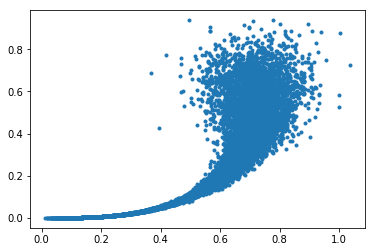

(640, 2)
Test run after starting [0.21881171]
0 0.000344241037965
1 0.000186034361832
2 2.54246027907e-05
3 -0.000141201145016
4 -0.000288737448864
5 -0.000420635053888
6 -0.000555612705648
7 -0.000680896500126
8 -0.000799611862749
9 -0.000891714636236
10 -0.0010179227218
11 -0.00115191331133
12 -0.00128846168518
13 -0.0014535930939
14 -0.00162946265191
15 -0.00182667281479
16 -0.0019838001579
17 -0.00214862767607
18 -0.00229571424425
19 -0.00246337838471
20 -0.00266343802214
21 -0.00281453132629
22 -0.00299690421671
23 -0.00309634115547
24 -0.00328051745892
25 -0.0033430006355
26 -0.00349403396249
27 -0.00335619673133
28 -0.00345633327961
29 -0.00342496670783
30 -0.00327194407582
31 -0.00355593189597
32 -0.0033156953752
33 -0.00327982231975
34 -0.0034065682441
35 -0.00326595529914
36 -0.00359753854573
37 -0.00340621098876
38 -0.00357753448188
39 -0.00347583852708
40 -0.0034940302372
41 -0.00343091972172
42 -0.00356670245528
43 -0.00342621915042
44 -0.00357144400477
45 -0.0034431848675

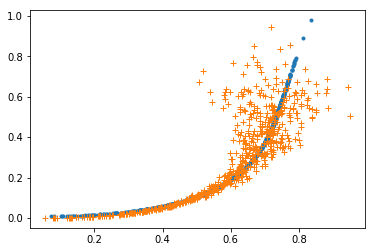

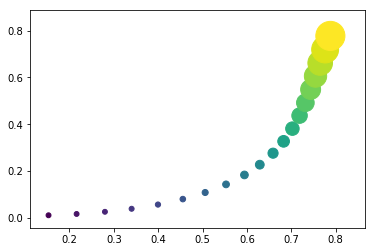

In [4]:
# https://github.com/oduerr/dl_tutorial/blob/master/tensorflow/vae/vae_demo-2D.ipynb

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

n_hidden_1 = 5
n_hidden_2 = 6
n_z = 1 # Dimension of the latent space
batch_size = 640 # We have to define the batch size with the current version of TensorFlow
runs = 2000 # Set to 0, for no training

def next_batch(batch_size, non_crossing=True):
    z_true = np.random.uniform(0,1,batch_size)
    r = np.power(z_true, 0.5)
    phi = 0.25 * np.pi * z_true
    x1 = r*np.cos(phi)
    x2 = r*np.sin(phi)
    
    # Sampling form a Gaussian
    x1 = np.random.normal(x1, 0.10* np.power(z_true,2), batch_size)
    x2 = np.random.normal(x2, 0.10* np.power(z_true,2), batch_size)
        
    # Bringing data in the right form
    X = np.transpose(np.reshape((x1,x2), (2, batch_size)))
    X = np.asarray(X, dtype='float32')
    return X

xx = next_batch(10000)
plt.plot(xx[:,0], xx[:,1], '.')
plt.show()
xx.shape

def weights(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# =============================== Q(z|X) ======================================

x = tf.placeholder("float32", shape=[None, 2]) #Batchsize x Number of Pixels

W_1 = weights([2, n_hidden_1])
b_1 = bias([n_hidden_1])
h_1   = tf.nn.softplus(tf.matmul(x, W_1) + b_1)

W_2 = weights([n_hidden_1, n_hidden_2]) 
b_2 = bias([n_hidden_2])
h_2   = tf.nn.softplus(tf.matmul(h_1, W_2) + b_2)

z_mu = tf.add(tf.matmul(h_2, weights([n_hidden_2, n_z])), bias([n_z]))
z_ls2 = tf.matmul(h_2, weights([n_hidden_2, n_z])) + bias([n_z])
eps = tf.random_normal((batch_size, n_z), 0, 1, dtype=tf.float32) 
z = z_mu + tf.sqrt(tf.exp(z_ls2)) * eps 

# =============================== P(X|z) ======================================

W_1g = weights([n_z, n_hidden_1])
b_1g = bias([n_hidden_1])
h_1g   = tf.nn.softplus(tf.matmul(z, W_1g) + b_1g)

W_2g = weights([n_hidden_1, n_hidden_2])
b_2g = bias([n_hidden_2])
h_2g   = tf.nn.softplus(tf.matmul(h_1g, W_2g) + b_2g)

x_mu = tf.add(tf.matmul(h_2g, weights([n_hidden_2, 2])), bias([2]))
x_ls2 = tf.add(tf.matmul(h_2g, weights([n_hidden_2, 2])), bias([2]))

# =============================== TRAINING ====================================

reconstr_loss = tf.reduce_sum(0.5 * x_ls2 + (tf.square(x-x_mu)/(2.0 * tf.exp(x_ls2))), 1)
kl_loss = -0.5 * tf.reduce_sum(1 + z_ls2 - tf.square(z_mu) - tf.exp(z_ls2), 1)
vae_loss = tf.reduce_mean(reconstr_loss + kl_loss)   

optimizer =  tf.train.AdamOptimizer(learning_rate=0.01).minimize(vae_loss)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    batch_xs = next_batch(batch_size)
    print(batch_xs.shape)
    dd = sess.run([vae_loss], feed_dict={x: batch_xs})
    print('Test run after starting {}'.format(dd))

    # train
    for epoch in range(runs):
        avg_cost = 0.
        batch_xs = next_batch(batch_size)
        _,d, z_mean_val, z_log_sigma_sq_val = sess.run((optimizer, vae_loss, z_mu, z_ls2), feed_dict={x: batch_xs})
        avg_cost += d / batch_size
        print(epoch, avg_cost)
    
    # test
    var = (x_mu, x_ls2, z, z_mu, z_ls2, vae_loss, reconstr_loss, kl_loss)
    x_sample = next_batch(batch_size)
    out = sess.run(var, feed_dict={x: x_sample})
    x_mu_val, x_ls2_val, z_vals, z_mu_val, z_ls2_val, vae_loss_val, reconstr_loss_val, kl_loss_val = out

    plt.plot(x_mu_val[:,0], x_mu_val[:,1], '.')
    plt.plot(x_sample[:,0], x_sample[:,1], '+')
    plt.show()

    # Sampling from z=-2 to z=2
    z_vals = np.reshape(np.asarray(np.linspace(-2,2, batch_size), dtype='float32'), (batch_size,1))
    x_mu_val, x_ls2_val = sess.run((x_mu, x_ls2), feed_dict={z: z_vals})
    idx = np.linspace(0, batch_size-1, 20, dtype='int32')
    plt.scatter(x_mu_val[idx,0], x_mu_val[idx,1], c=z_vals[idx], s=60000* np.mean(np.exp(x_ls2_val[idx,:]), axis=1))
    plt.show()